# Data processing

In this notebook, I am loading a list of molecules I obtained from ChEMBL and processing them to make sure I have:
- Standard SMILES representation of the compound
- InChIKey associated to the compound

In [39]:
# In this codeblock I will import the necessary packages and specify the paths to relevant folders

# importing packages

import rdkit
import pathlib
import chemprop
import numpy as np
import pandas as pd
from rdkit import Chem
import sys 
import ersilia
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns


sys.path.append('/Users/ashitasrivastava/Desktop/projects/ERSILIA/model-validation-example/src')
import smiles_processing

In [29]:
# Appplying some settings to pandas for clear representation of data
# pd.set_option('display.max_rows',None) 
pd.set_option('display.max_columns',None)
pd.set_option('max_colwidth', 30)

In [30]:
# In this codeblock I will load the data from the /data folder to a Pandas dataframe and understand which headers it has# In this codeblock I will load the data from the /data folder to a Pandas dataframe and understand which headers it has
df = pd.read_csv('/Users/ashitasrivastava/Desktop/projects/ERSILIA/model-validation-example/data/reference_library.csv')
print(df.head())

                          smiles
0   CCCCNC(=S)N/N=C/C1=C(C)C=CS1
1  CN1C(SCC2=NC(C3=CC=CS3)=NO...
2  O=C(O)CC(NC(=O)C1=CN=CC=N1...
3  O=S(=O)(C1=CC=CC=C1)N1CCN(...
4  CCC[C@@H](C)N(C1=CC(Cl)=CC...


In [31]:
# # In this codeblock I will convert the molecules to standard SMILES by using the function standardise_smiles from /src
# # I will import the function directly from src, not copying it here

# # making a list of smiles

# smiles_list=df['smiles'].tolist()

# #standardising the smiles

# from smiles_processing import standardise_smiles

# standard_smiles_list=standardise_smiles(smiles_list)
# standard_smiles_list
# # for smile in standard_smiles_list:
# #     print(type(smile))
# # print(type(standard_smiles_list[29]))
# # print(len(standard_smiles_list))
# print((smiles_list[200]))
# # for sm in standard_smiles_list:
# #     if type(sm)==float:
# #         print(standard_smiles_list.index(sm))

In [32]:
# In this codeblock I will convert the molecules to standard SMILES by using the function standardise_smiles from /src
# I will import the function directly from src, not copying it here

# making a list of smiles

smiles_list=df['smiles'].tolist()

#standardising the smiles

import molvs
from molvs import standardize_smiles
# import smiles_processing
# from smiles_processing import standardize_smiles

standard_smiles_list=[standardize_smiles(x) for x in smiles_list]
standard_smiles_list

['CCCCNC(=S)N/N=C/c1sccc1C',
 'Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1',
 'O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl',
 'O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1',
 'CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1',
 'Cn1c(=O)c2c(nc(N3CCC[C@@H](N)C3)n2Cc2cc(F)ccc2Cl)c2ccc(C(=O)O)cc21',
 'CNC(=O)c1cccc2c1nc(-c1ccccc1O)n2Cc1ccccc1',
 'C[C@]12CCC3C(CC[C@@H]4C[C@@H](S)CC[C@]34C)C1=CC[C@@H]2C1=CC(=O)OC1',
 'CC1=C(C(=O)OCc2ccccc2)C(c2ccc(-c3ccccc3C)cc2)NC(=S)N1CCCCCc1nnn[nH]1',
 'CC(C)Cc1cc(C(=O)NCc2cccnc2)no1',
 'COC(=O)CC1NN=C2N(CCN2c2ccc(Cl)cc2)C1=O',
 'CCN1c2ncc(COc3cccc(C(=O)O)c3)cc2C(=O)N(C)c2ccc(Cl)nc21',
 'Cc1c(NC(=S)N/N=C\\c2ccccc2O)c(=O)n(-c2ccccc2)n1C',
 'C[C@@H](O)c1nc(-c2nc(-c3nc(CO)cs3)cs2)cs1',
 'CCCCCCCCCCCC(=O)CCCC',
 'C=Cc1c(N)ncnc1N1CCC(c2nc(-c3ccc(C(F)(F)F)c(F)c3)cn2CCN2CCCC2)CC1',
 'O=C1/C(=N/c2ccc(O)cc2)C(Cl)=C(O)c2ccccc21',
 'O=C(O)CC[C@H](NC(=O)c1cccc(-c2ccccc2)n1)C(=O)N1CCN(C(=O)OCCCC(F)(F)F)CC1',
 'CC(=O)Nc1c2c(nn1-c1ccccc1)C[S+]([O-])C2',
 'O=C(O)CSC(C(=O)Nc1ccc(Cl)cc

In [33]:
# In this codeblock I will get the Inchikey representation of the molecules using the RDKIT package

#making the list of inchikeys

mol_list = [Chem.MolFromSmiles(smiles) for smiles in standard_smiles_list]
InChIKey_list = [Chem.MolToInchiKey(mol) for mol in mol_list]


In [34]:
# In this codeblock I will save the data as a .csv file containing only the standard smiles and the inchikey as columns. 
# All data will be saved with informative names in the /data folder

#creating the dataframe with standard smiles and inchikeys
df = pd.DataFrame({'standard smiles': standard_smiles_list})
df['inchikey'] = InChIKey_list
print(df)

#making the csv file which contains the 1000 molecules on which predictions will be amde by the eos30f3 model
df.to_csv('/Users/ashitasrivastava/Desktop/projects/ERSILIA/model-validation-example/data/1000_values_dataset.csv',index=False)


                   standard smiles                     inchikey
0         CCCCNC(=S)N/N=C/c1sccc1C  SUTWUYBMBWPLMW-MDWZMJQESA-N
1    Cn1c(SCc2nc(-c3cccs3)no2)n...  RIYHJWOTNJXDLV-UHFFFAOYSA-N
2    O=C(O)CC(NC(=O)c1cnccn1)c1...  OGNBARHGQVMGGX-UHFFFAOYSA-N
3    O=S(=O)(c1ccccc1)N1CCN(c2n...  WQEXDIRUOYNDCM-UHFFFAOYSA-N
4    CCC[C@@H](C)N(c1cc(Cl)ccc1...  YEGVLLQDOGYWDQ-OAHLLOKOSA-N
..                             ...                          ...
995  CCCn1c(-c2cnc(Nc3ccc(C)nc3...  RGKVPYQYBUAAEH-UHFFFAOYSA-N
996  CN(Cc1cccc2ccccc12)Cn1nc(-...  VTRFEMUYHTXFEQ-UHFFFAOYSA-N
997  O=C(N[C@@H](CSCc1ccccc1)C(...  QDFOYTHIYBSDPW-RGAOVNQFSA-N
998  CN1CC[C@]23CCCC[C@H]2[C@H]...  YZQZXLROYFNFQE-QTGUNEKASA-N
999  O=C(CN1C(=O)/C(=C/c2ccco2)...  PRGIOMDFWSHPTC-QPEQYQDCSA-N

[1000 rows x 2 columns]


# Model Bias Evaluation

Now, I will use the predictions I got from the Ersilia Model Hub on the dataset of 1000 molecules curated above and see how are they distributed in their space (which might be 0 to 1 for probabilities, or different for regression models)

In [35]:
# In this codeblock I will load the predictions I've run on Ersilia and saved in the /data folder

predictions=pd.read_csv('/Users/ashitasrivastava/Desktop/projects/ERSILIA/model-validation-example/data/output.csv')
predictions

,key,input,activity
0,SUTWUYBMBWPLMW-MDWZMJQESA-N,CCCCNC(=S)N/N=C/c1sccc1C,0.240927
1,RIYHJWOTNJXDLV-UHFFFAOYSA-N,Cn1c(SCc2nc(-c3cccs3)no2)n...,0.286598
2,OGNBARHGQVMGGX-UHFFFAOYSA-N,O=C(O)CC(NC(=O)c1cnccn1)c1...,0.272443
3,WQEXDIRUOYNDCM-UHFFFAOYSA-N,O=S(=O)(c1ccccc1)N1CCN(c2n...,0.840128
4,YEGVLLQDOGYWDQ-OAHLLOKOSA-N,CCC[C@@H](C)N(c1cc(Cl)ccc1...,0.735199
...,...,...,...
995,RGKVPYQYBUAAEH-UHFFFAOYSA-N,CCCn1c(-c2cnc(Nc3ccc(C)nc3...,0.751911
996,VTRFEMUYHTXFEQ-UHFFFAOYSA-N,CN(Cc1cccc2ccccc12)Cn1nc(-...,0.679144
997,QDFOYTHIYBSDPW-RGAOVNQFSA-N,O=C(N[C@@H](CSCc1ccccc1)C(...,0.567284
998,YZQZXLROYFNFQE-QTGUNEKASA-N,CN1CC[C@]23CCCC[C@H]2[C@H]...,0.865682


In [36]:
# In this codeblock I will load the predictions I've run on Ersilia and saved in the /data folder

predictions2=pd.read_csv('/Users/ashitasrivastava/Desktop/projects/ERSILIA/model-validation-example/data/output2.csv')
predictions2

,key,input,score,alea,epis
0,SUTWUYBMBWPLMW-MDWZMJQESA-N,CCCCNC(=S)N/N=C/c1sccc1C,0.424873,0.237075,0.007281
1,RIYHJWOTNJXDLV-UHFFFAOYSA-N,Cn1c(SCc2nc(-c3cccs3)no2)n...,0.420451,0.239160,0.004512
2,OGNBARHGQVMGGX-UHFFFAOYSA-N,O=C(O)CC(NC(=O)c1cnccn1)c1...,0.423009,0.237702,0.006370
3,WQEXDIRUOYNDCM-UHFFFAOYSA-N,O=S(=O)(c1ccccc1)N1CCN(c2n...,0.430128,0.238675,0.006443
4,YEGVLLQDOGYWDQ-OAHLLOKOSA-N,CCC[C@@H](C)N(c1cc(Cl)ccc1...,0.434911,0.239533,0.006230
...,...,...,...,...,...
995,RGKVPYQYBUAAEH-UHFFFAOYSA-N,CCCn1c(-c2cnc(Nc3ccc(C)nc3...,0.537496,0.230171,0.018423
996,VTRFEMUYHTXFEQ-UHFFFAOYSA-N,CN(Cc1cccc2ccccc12)Cn1nc(-...,0.159782,0.125929,0.008322
997,QDFOYTHIYBSDPW-RGAOVNQFSA-N,O=C(N[C@@H](CSCc1ccccc1)C(...,0.168565,0.131516,0.008635
998,YZQZXLROYFNFQE-QTGUNEKASA-N,CN1CC[C@]23CCCC[C@H]2[C@H]...,0.171498,0.133209,0.008878


### Data Processing

In [37]:
#checking if any row has null value

rows_with_nan = predictions.isnull().any(axis=1)
print(df[rows_with_nan])


Empty DataFrame
Columns: [standard smiles, inchikey]
Index: []


### Observations' Section

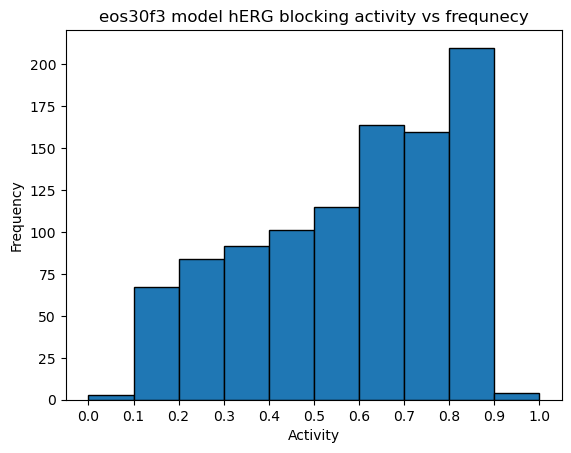

In [54]:
# In this codeblock I will create the necessary plots with MatPlotLib to observe the distribution of predicted values

# Plot between the hERG blocking activity of molecules and their frequency
b = np.arange(0.0, 1.1, 0.1)
plt.hist(predictions['activity'], bins=b, edgecolor='black')  # You can adjust the number of bins as per your requirement
plt.title('eos30f3 model hERG blocking activity vs frequnecy')
plt.xlabel('Activity')
ticks=np.arange(0.0,1.1,0.1)
plt.xticks(ticks)
plt.ylabel('Frequency')
plt.show()


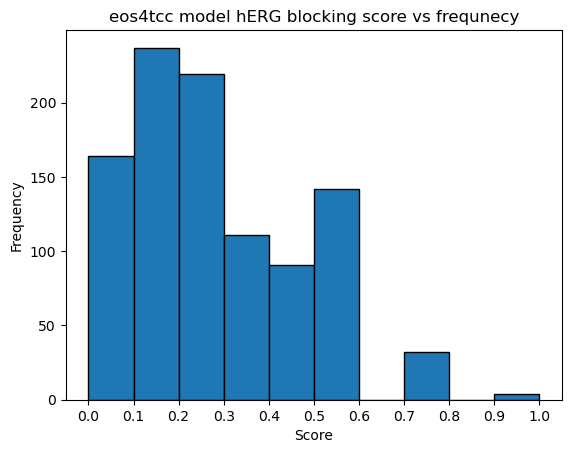

In [53]:
# In this codeblock I will create the necessary plots with MatPlotLib to observe the distribution of predicted values

# Plot between the hERG blocking activity of molecules and their frequency
b = np.arange(0.0, 1.1, 0.1)
plt.hist(predictions2['score'], bins=b, edgecolor='black')
plt.title('eos4tcc model hERG blocking score vs frequnecy')
plt.xlabel('Score')
ticks=np.arange(0.0,1.1,0.1)
plt.xticks(ticks)
plt.ylabel('Frequency')
plt.show()